# Data processing

Here I'm generating non-upsampled matrices from dataset without album duplicates. I'll read these files in python and upsample to 16.

In [1]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")
cat(howto_data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘DescTools’


The following object is masked from ‘package:data.table’:

    %like%


The following objects are masked from ‘package:caret’:

    MAE, RMSE



Attaching package: ‘tensorflow’


The following object is masked from ‘package:caret’:

    train


`summarise()` regrouping output by 'album_id' (override with `.groups` argument)



How to use datasets
 
call    base()             for real values
call    z_scored()         for normalized
call    min_maxed()        for normalized2
call    upsampled_album()  for binded upsamplped albums
call    list_upsampled()   for list of upsampled albums
call    low()              for normalized low level
call    low_upsampled()    for normalized and upsampled low level

In [4]:
# Calling processed data
dt = min_maxed()

# Separating albums
dt = album_splitter(dt)

# # writing albums for upsampling (python)
# setwd("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_nearest")
# for(i in 1:length(dt)){
#     write.csv(dt[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
# }

# # writing albums for upsampling (python)
# setwd("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_bilinear")
# for(i in 1:length(dt)){
#     write.csv(dt[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
# }

# # writing albums for upsampling (python)
# setwd("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_100")
# for(i in 1:length(dt)){
#     write.csv(dt[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
# }

track_number,valence,energy,loudness,tempo
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000000,0.97478992,0.7723233,0.9198745
2,0.26077628,0.00000000,0.7302864,0.6236376
3,0.21396528,0.33193277,0.4618423,0.3796112
4,0.28418178,0.06722689,0.5674989,0.4995638
5,1.00000000,0.56722689,0.6415573,0.5697526
6,0.90442754,0.49159664,0.3520948,0.5305973
7,0.41486249,0.87815126,0.7421357,1.0000000
8,0.19836161,0.72268908,1.0000000,0.3792903
9,0.02789155,1.00000000,0.4681902,0.6199376


# Writing upsampled low level by track

Adding missing grouping variables: `album_id`

`summarise()` regrouping output by 'album_id' (override with `.groups` argument)



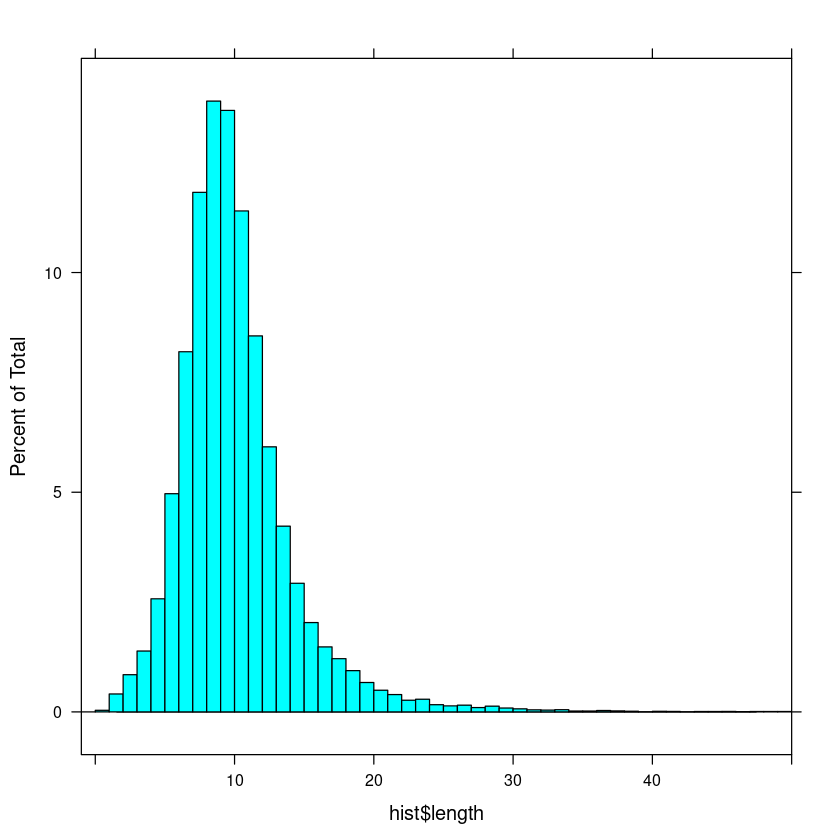

In [3]:
# Verifying number ----- Just for checking...
low = low_z()
low %>% 
    select("position", "track_id", "danceability", "energy", "loudness_overall", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo_overall", "loudness_continuouos", "tempo_continuous", "tempo_confidence", "mode_confidence", "time_signature_confidence", "loudness", "loudness_continuous") %>%
    group_by(album_id, track_id) %>%
    summarise(length = NROW(valence)) -> hist

#upsample each track id to 20
histogram(hist$length, breaks = seq(-1, 1000, 1), xlim = c(-1, 50))
# End of just for checking...

In [14]:
# Writting tracks for upsampling
low = low()
low %<>% 
    select("track_number", "position", "track_id", "danceability", "energy", "loudness_overall", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo_overall", "loudness_continuouos", "tempo_continuous", "tempo_confidence", "mode_confidence", "time_signature_confidence", "loudness", "loudness_continuous") %>%
    ungroup()

splitted <- split(low, low$track_id)

setwd("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_low")
for(i in 1:length(splitted)){
    write.csv(splitted[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
}

Adding missing grouping variables: `album_id`



In [36]:
# Reading file with upsampled low level tracks
ut = fread("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_tracks.csv")
# Filtering albums with less than 6 and more than 16 tracks
ut %<>% group_by(album_id) %>% arrange(album_id, track_number)
ut %<>% group_by(album_id) %>% mutate(album_length = length(unique(track_number))) %>%
       filter(album_length %in% c(6:16))

In [37]:
ut = split(ut, ut$album_id)

In [40]:
setwd("/home/pasoneto/Documents/github/doc_suomi/data/dissimilarities/upsampled_low_albums/")
for(i in 1:length(ut)){
    write.csv(ut[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
}

In [41]:
i

[1] 3765